### Dataset-1

#### Libraries imported

In [ ]:
import numpy as np
import pandas  as pd
import sklearn
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,f1_score,roc_curve,auc,log_loss
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC

In [ ]:
# !pip install imblearn

### Loading data
#### dataset-2 (Without Outlier and Collinear Featues)

In [ ]:
X_train=pd.read_csv('X_train_w.csv')
X_cv=pd.read_csv('X_cv_w.csv')
y_train=pd.read_csv('y_train_w.csv')
y_cv=pd.read_csv('y_cv_w.csv')
print(X_train.shape,y_train.shape)
print(X_cv.shape,y_cv.shape)

(373242, 494) (373242, 2)
(183841, 494) (183841, 2)


In [ ]:
X_train=X_train.drop(['Unnamed: 0'],axis=1)
X_cv=X_cv.drop(['Unnamed: 0'],axis=1)
y_train=y_train.drop(['Unnamed: 0'],axis=1)
y_cv=y_cv.drop(['Unnamed: 0'],axis=1)

print(X_train.shape,y_train.shape)
print(X_cv.shape,y_cv.shape)

(373242, 493) (373242, 1)
(183841, 493) (183841, 1)


In [ ]:
print(X_train.columns.tolist())

['Unnamed: 0', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'Admitted_or_Not', 'Claim_time', 'RenalDiseaseIndicator', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Dead_or_Alive', 'Age', 'Tolat_chronic_cond', 'Total_ip_op_amount_reimb', 'total_ip_op_amount_deduct', 'Mean_InscClaimAmtReimbursed', 'Mean_IPAnnualReimbursementAmt', 'Mean_OPAnnualReimbursementAmt', 'Total_physican_attended', 'Total_ClmDiagnosisCode', 'Total_ClmProcedureCode', 'ClmAdmitDiagnosisCode_42731', 'ClmAdmitDiagnosisCode_V7612', 'ClmAdmitDiagnosisCode_78605', 'ClmAdmitDiagnosisCode_78650', 'ClmAdmitDiagnosisCode_78900', 'ClmAdmitDiagnosisCode_4019', 'ClmAdmitDiagnosisCode_486', 'ClmAdmitDi

##### Normalization

In [ ]:
# normalazition of continous data
Cont_col=['InscClaimAmtReimbursed', 'DeductibleAmtPaid','Claim_time', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
          'OPAnnualDeductibleAmt',  'Age', 'Tolat_chronic_cond', 'Total_ip_op_amount_reimb', 'total_ip_op_amount_deduct',
          'Mean_InscClaimAmtReimbursed', 'Mean_IPAnnualReimbursementAmt', 'Mean_OPAnnualReimbursementAmt', 
          'Total_physican_attended', 
          'Total_ClmDiagnosisCode', 'Total_ClmProcedureCode','Diff_max_IPAnnualReimbursementAmt',
          'Diff_max_OPAnnualReimbursementAmt', 'Diff_max_InscClaimAmtReimbursed']

for i in Cont_col:
    data_train=np.array(X_train[i]).reshape(-1,1)
    data_cv=np.array(X_cv[i]).reshape(-1,1)
    X_train[i]=normalize(data_train,axis=0).ravel()
    X_cv[i]=normalize(data_cv,axis=0).ravel()

In [ ]:
# taking column names for featuere importance
X_train_columns=X_train.columns
y_train=np.array(y_train).ravel()
y_cv=np.array(y_cv).ravel()

In [ ]:
# droping mean features as they cause overfitting to model.
X_train.drop(['Mean_OPAnnualReimbursementAmt','Mean_InscClaimAmtReimbursed','Mean_IPAnnualReimbursementAmt'],axis=1,inplace=True)
X_cv.drop(['Mean_OPAnnualReimbursementAmt','Mean_InscClaimAmtReimbursed','Mean_IPAnnualReimbursementAmt'],axis=1,inplace=True)

In [ ]:
X_cv.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Admitted_or_Not,Claim_time,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,...,NoOfMonths_PartACov_3,NoOfMonths_PartACov_4,NoOfMonths_PartACov_5,NoOfMonths_PartACov_6,NoOfMonths_PartACov_7,NoOfMonths_PartACov_8,NoOfMonths_PartACov_9,NoOfMonths_PartACov_10,NoOfMonths_PartACov_11,NoOfMonths_PartACov_12
0,0.000054,0.0,0,0.000417,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.000714,0.0,0,0.000417,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.000119,0.0,0,0.000417,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.000012,0.0,0,0.000417,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0.000054,0.0,0,0.000417,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Modeling on dataset_2

In [ ]:
#refrence: appliedroots.com
import sklearn
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


# def plot_confusion_matrix(y_true, y_pred):
#     conf_mat = pd.DataFrame(confusion_matrix(y_ture, y_pred))
#     sns.heatmap(conf_mat, annot = True, fmt= 'd',annot_kws={"size": 15}, 
#     	xticklabels= ['Predicted No', 'Predicted Yes'], yticklabels= ['Actaual No','Actual Yes'])


def plot_roc_confusion_matrix_f1(model,x_tr,y_tr,x_te,y_te):
    y_predict_tr=model.predict_proba(x_tr)[:,1]
    fpr_tr,tpr_tr,thresold_tr=roc_curve(y_tr,y_predict_tr)
    y_predict_te=model.predict_proba(x_te)[:,1]
    fpr_te,tpr_te,thresold_te=roc_curve(y_te,y_predict_te)
    
    

    plt.figure(1)
    plt.figure(figsize=(7,4))
#     plt.subplot(3,1,1)

    plt.plot(fpr_tr, tpr_tr, label="train AUC ="+str(auc(fpr_tr, tpr_tr)))
    plt.plot(fpr_te, tpr_te, label="test AUC ="+str(auc(fpr_te, tpr_te)))
    auc_score_test=auc(fpr_te, tpr_te)

    plt.legend()
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.title("ROC_CURVE")
    plt.grid(True)
    plt.show()

    train_best_threshold=find_best_threshold(thresold_tr,fpr_tr,tpr_tr)
    test_best_threshold=find_best_threshold(thresold_te,fpr_te,tpr_te)

    prediction_tr=predict_with_best_t(y_predict_tr,train_best_threshold)
    prediction_te=predict_with_best_t(y_predict_te,test_best_threshold)
    
    plt.figure(2)
    plt.figure(figsize=(5,5))

    plt.subplot(2,1,1)
    conf_mat = pd.DataFrame(confusion_matrix(y_tr, prediction_tr))

    sns.heatmap(conf_mat, annot = True, fmt= 'd',annot_kws={"size": 15}, xticklabels= ['Predicted No', 'Predicted Yes'], yticklabels= ['Actaual No','Actual Yes'])
    plt.title('confusion matrix of train data')
    plt.xlabel('Actual')
    plt.ylabel('predicted')
    plt.show()
    plt.figure(figsize=(5,5))
    plt.subplot(2,1,2)
    conf_mat_te = pd.DataFrame(sklearn.metrics.confusion_matrix(y_te,prediction_te))

    sns.heatmap(conf_mat_te, annot = True, fmt= 'd',annot_kws={"size": 15}, xticklabels= ['Predicted No', 'Predicted Yes'], yticklabels= ['Actaual No','Actual Yes'])
    plt.title('confusion matrix of test data')
    plt.xlabel('Actual')
    plt.ylabel('predicted')
    plt.show()
    
     

    print('train_auc_score =',auc(fpr_tr, tpr_tr))
    print('validation_auc_score =',auc(fpr_te, tpr_te))
    print('-'*110)
    print('logloss Train:--',sklearn.metrics.log_loss(y_tr,prediction_tr))
    print('logloss Test:--',sklearn.metrics.log_loss(y_te,prediction_te))
    print('-'*110)
    print('F1 Train:--',sklearn.metrics.f1_score(y_tr,prediction_tr))
    print('F1 Test:--',sklearn.metrics.f1_score(y_te,prediction_te))
   

In [ ]:
np.logspace(-1,1,7)

array([ 0.1       ,  0.21544347,  0.46415888,  1.        ,  2.15443469,
        4.64158883, 10.        ])

#### 1. Logistic regression

In [ ]:
model_logistic=LogisticRegression()
parameters={'C':np.logspace(-1,1,7),
           'penalty':['l1', 'l2']}

model_lr_grid=GridSearchCV(model_logistic,parameters,n_jobs=-1,cv=5,verbose=2,return_train_score=True,scoring='roc_auc')
model_lr_grid=model_lr_grid.fit(X_train,y_train)
best_para=model_lr_grid.best_params_
print(best_para)
# best_para=best_para.values()

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  70 | elapsed:   10.8s remaining:   58.1s
[Parallel(n_jobs=-1)]: Done  47 out of  70 | elapsed:  1.7min remaining:   50.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  2.3min finished


{'C': 1.0, 'penalty': 'l2'}


/home/mitul/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


/home/mitul/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/mitul/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

<Figure size 432x288 with 0 Axes>

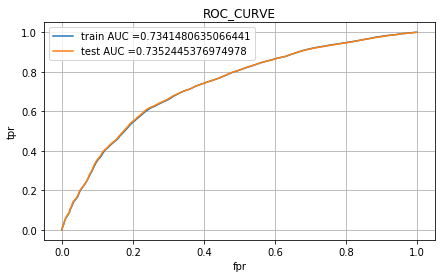

the maximum value of tpr*(1-fpr) 0.46355023172967447 for threshold 0.384
the maximum value of tpr*(1-fpr) 0.4655605767946919 for threshold 0.409


<Figure size 432x288 with 0 Axes>

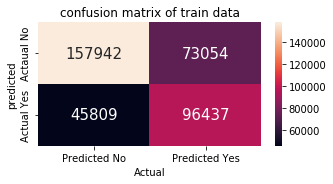

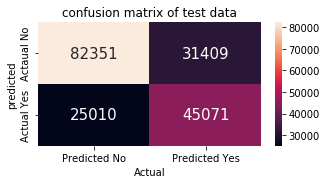

train_auc_score = 0.7341480635066441
validation_auc_score = 0.7352445376974978
--------------------------------------------------------------------------------------------------------------
logloss Train:-- 10.99940787054762
logloss Test:-- 10.599748369406994
--------------------------------------------------------------------------------------------------------------
F1 Train:-- 0.6187074360759229
F1 Test:-- 0.6150476593363855


In [ ]:
# modeling with best hypermeters:
model_lr_best=LogisticRegression(C=best_para.get('C'),penalty=best_para.get("penalty"))
model_lr_best=model_lr_best.fit(X_train,y_train)
clf_model_lr_best=CalibratedClassifierCV(model_lr_best)
clf_model_lr_best.fit(X_train,y_train)

# getting validation score
plot_roc_confusion_matrix_f1(clf_model_lr_best,X_train,y_train,X_cv,y_cv)

#### 2. Naive Bayes

<Figure size 432x288 with 0 Axes>

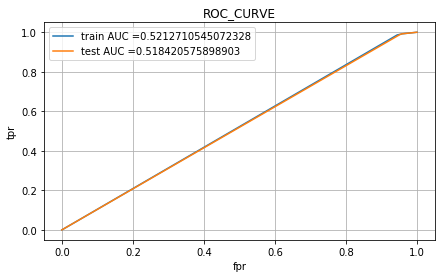

the maximum value of tpr*(1-fpr) 0.05541719023968082 for threshold 0.39
the maximum value of tpr*(1-fpr) 0.04735727741684317 for threshold 0.39


<Figure size 432x288 with 0 Axes>

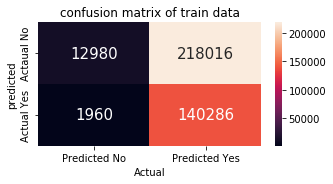

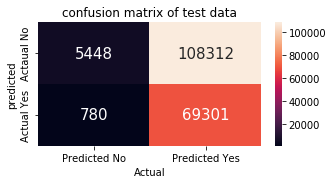

train_auc_score = 0.5212710545072328
validation_auc_score = 0.518420575898903
--------------------------------------------------------------------------------------------------------------
logloss Train:-- 20.356434166787803
logloss Test:-- 20.495922022130298
--------------------------------------------------------------------------------------------------------------
F1 Train:-- 0.5605296594931954
F1 Test:-- 0.559569468780027


In [ ]:
# gaussian navie bayes wihtout prior
from sklearn.naive_bayes import GaussianNB
model_gaussian=GaussianNB()
model_gaussian.fit(X_train,y_train)

clf_model_gaussian=CalibratedClassifierCV(model_gaussian)
clf_model_gaussian.fit(X_train,y_train)


plot_roc_confusion_matrix_f1(clf_model_gaussian,X_train,y_train,X_cv,y_cv)

<Figure size 432x288 with 0 Axes>

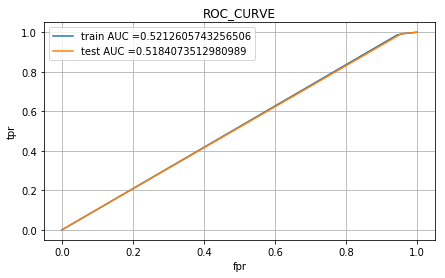

the maximum value of tpr*(1-fpr) 0.0553838243797855 for threshold 0.39
the maximum value of tpr*(1-fpr) 0.0473311996209088 for threshold 0.39


<Figure size 432x288 with 0 Axes>

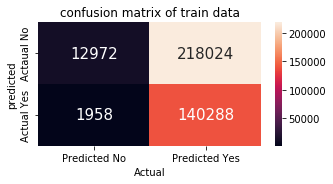

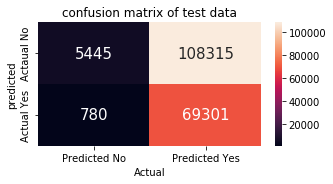

train_auc_score = 0.5212605743256506
validation_auc_score = 0.5184073512980989
--------------------------------------------------------------------------------------------------------------
logloss Train:-- 20.356989407235417
logloss Test:-- 20.496485654442875
--------------------------------------------------------------------------------------------------------------
F1 Train:-- 0.5605264524790334
F1 Test:-- 0.5595626915142291


In [ ]:
# gaussian naive bayes with priors[0.5,.0.5] # for balancing data
from sklearn.naive_bayes import GaussianNB
model_gaussian=GaussianNB(priors=[0.5,0.5])
model_gaussian.fit(X_train,y_train)

clf_model_gaussian=CalibratedClassifierCV(model_gaussian)
clf_model_gaussian.fit(X_train,y_train)


plot_roc_confusion_matrix_f1(clf_model_gaussian,X_train,y_train,X_cv,y_cv)


#### 3. Decision Tree

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
/home/mitul/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 119 out of 160 | elapsed:  3.6min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  4.9min finished


<Figure size 432x288 with 0 Axes>

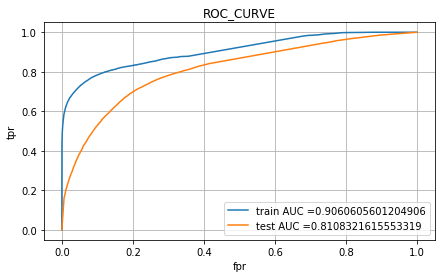

the maximum value of tpr*(1-fpr) 0.706280127844259 for threshold 0.404
the maximum value of tpr*(1-fpr) 0.5609292061199588 for threshold 0.364


<Figure size 432x288 with 0 Axes>

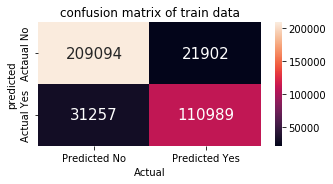

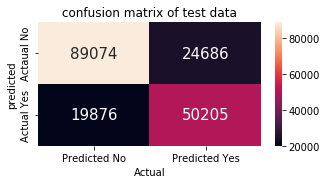

train_auc_score = 0.9060605601204906
validation_auc_score = 0.8108321615553319
--------------------------------------------------------------------------------------------------------------
logloss Train:-- 4.919232902942255
logloss Test:-- 8.372107922455665
--------------------------------------------------------------------------------------------------------------
F1 Train:-- 0.8067907987657058
F1 Test:-- 0.6926165052561873


In [ ]:
from sklearn.tree import DecisionTreeClassifier 

parameters = {'criterion':['gini','entropy'], 
              'max_depth': [10,20,25,50],
              'min_samples_split': [5, 10,12,15]}

model_dec=DecisionTreeClassifier()


dec_grid=GridSearchCV(model_dec,parameters,n_jobs=-1,cv=5,verbose=3,return_train_score=True,scoring='roc_auc')
dec_grid.fit(X_train,y_train)
best_grid_dec=dec_grid.best_params_


best_model_dec=DecisionTreeClassifier(criterion=best_grid_dec.get('criterion'),max_depth=best_grid_dec.get('max_depth'),
                                     min_samples_split=best_grid_dec.get('min_samples_split'))
best_model_dec.fit(X_train,y_train)
clf_best_model_dec=CalibratedClassifierCV(best_model_dec)
clf_best_model_dec.fit(X_train,y_train)

plot_roc_confusion_matrix_f1(clf_best_model_dec,X_train,y_train,X_cv,y_cv)


#### 4.Random Forest

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 out of 135 | elapsed:  6.8min remaining:  6.7min
[Parallel(n_jobs=-1)]: Done  96 out of 135 | elapsed: 10.1min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done 124 out of 135 | elapsed: 12.1min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 12.9min finished


{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 6, 'n_estimators': 300}


<Figure size 432x288 with 0 Axes>

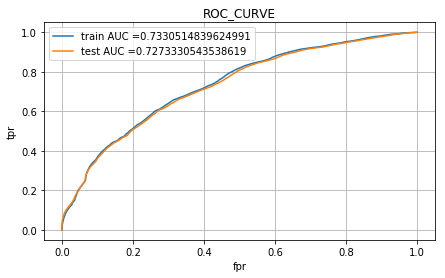

the maximum value of tpr*(1-fpr) 0.4509126570768924 for threshold 0.319
the maximum value of tpr*(1-fpr) 0.44343268747429515 for threshold 0.319


<Figure size 432x288 with 0 Axes>

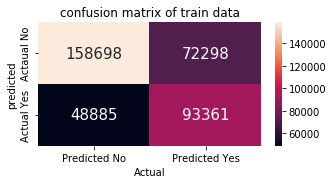

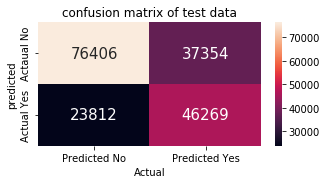

train_auc_score = 0.7330514839624991
validation_auc_score = 0.7273330543538619
--------------------------------------------------------------------------------------------------------------
logloss Train:-- 11.21409259718753
logloss Test:-- 11.491607775923292
--------------------------------------------------------------------------------------------------------------
F1 Train:-- 0.6064273071239507
F1 Test:-- 0.602053297246656


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_ramdom_forest=RandomForestClassifier()


parameters = {'max_features': [ 'sqrt'], 
              'max_depth': [5,7,10],
              'min_samples_split': [2,4,6],
             'n_estimators': [150,200,300],
             'criterion' :['gini']}



rf_grid=GridSearchCV(model_ramdom_forest,parameters,n_jobs=-1,cv=5,verbose=5,return_train_score=True,scoring='roc_auc')
rf_grid.fit(X_train,y_train)
best_grid_rf=rf_grid.best_params_
print(best_grid_rf)

best_model_rf=RandomForestClassifier(max_features=best_grid_rf.get('max_features'),max_depth=best_grid_rf.get('max_depth'),
                        min_samples_split=best_grid_rf.get('min_samples_split'),n_estimators=best_grid_rf.get('n_estimators'),
                        criterion=best_grid_rf.get('criterion'),n_jobs=-1 )
best_model_rf.fit(X_train,y_train)
clf_best_model_rf=CalibratedClassifierCV(best_model_rf)
clf_best_model_rf.fit(X_train,y_train)

plot_roc_confusion_matrix_f1(clf_best_model_rf,X_train,y_train,X_cv,y_cv)


In [ ]:
def important_feature_selection(randomj_forest_model,col_name,num_feature_take):

    # argsort sort indices in the incressing order
    
    top_feature_index=np.argsort(randomj_forest_model.feature_importances_)[::-1]
    
    ## for ploting
    top_value=np.take(randomj_forest_model.feature_importances_,top_feature_index[:20])
    top_feature_name = np.take(col_name, top_feature_index[:20])


    sns.set()
    plt.figure(figsize = (10, 5))
    ax = sns.barplot(y = top_feature_name, x = top_value)
#     ax.set_xticklabels(labels = top_feature_name, rotation = 45)
    sns.set_palette(reversed(sns.color_palette("husl", 10)), 10)
    plt.title('Important Features')
    plt.ylabel('Feature Names')
    plt.xlabel('Importance')
    plt.show()
    return top_feature_index[:num_feature_take]

In [ ]:
###checking important features.


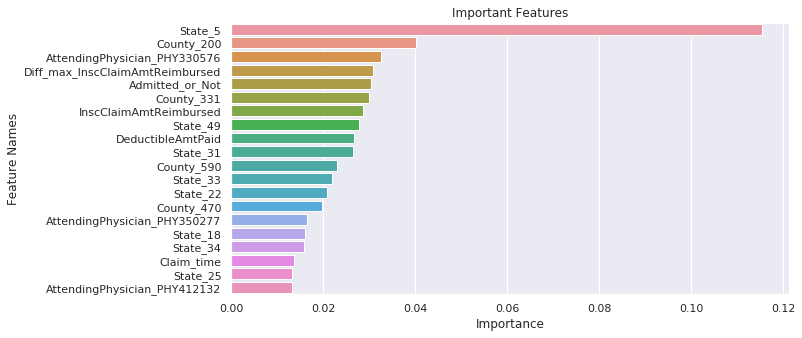

In [ ]:
d1_important_inc=important_feature_selection(best_model_rf,X_train.columns,200)

#### 5. LightGBM

<Figure size 432x288 with 0 Axes>

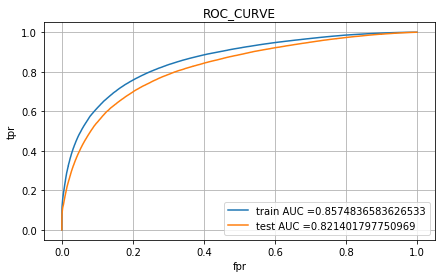

the maximum value of tpr*(1-fpr) 0.6063575694626249 for threshold 0.37
the maximum value of tpr*(1-fpr) 0.5616660626840257 for threshold 0.315


<Figure size 432x288 with 0 Axes>

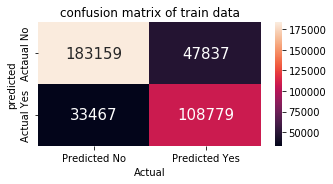

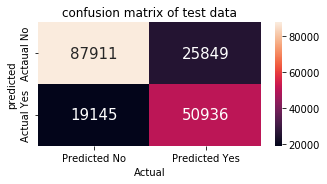

train_auc_score = 0.8574836583626533
validation_auc_score = 0.821401797750969
--------------------------------------------------------------------------------------------------------------
logloss Train:-- 7.523748469770515
logloss Test:-- 8.453274154876135
--------------------------------------------------------------------------------------------------------------
F1 Train:-- 0.727954708193079
F1 Test:-- 0.6936390995873789


In [ ]:
clf = lgb.LGBMClassifier()
prams={
    'learning_rate':[0.1,0.15,0.2],
     'n_estimators':[1000,1200,1300],
     'max_depth':[5,7],
}

random_cfl1=RandomizedSearchCV(clf,param_distributions=prams,verbose=2,n_jobs=-1,)
random_cfl1.fit(X_train,y_train)
print(random_cfl1.best_params_)

best_para={'subsample': 0.3, 'n_estimators': 1200, 'max_depth': 7, 'learning_rate': 0.15, 'colsample_bytree': 0.1}

clf = lgb.LGBMClassifier(subsample=best_para.get('subsample'),n_estimators=best_para.get('n_estimators'),
                       max_depth=best_para.get('max_depth'),learning_rate=best_para.get('learning_rate'),
                        colsample_bytree=best_para.get('colsample_bytree'))
clf.fit(X_train,y_train)

plot_roc_confusion_matrix_f1(clf,X_train,y_train,X_cv,y_cv)


### Modeling on Top 200 important featues

In [ ]:
# train model on important featues
colum_name=np.take(X_train.columns,d1_important_inc) # getting the freatues importance from previosuly trained random forest.
X_train_imp=X_train[colum_name]
X_train_imp.shape
X_cv_imp=X_cv[colum_name]
X_cv_imp.shape

(183841, 200)

<Figure size 432x288 with 0 Axes>

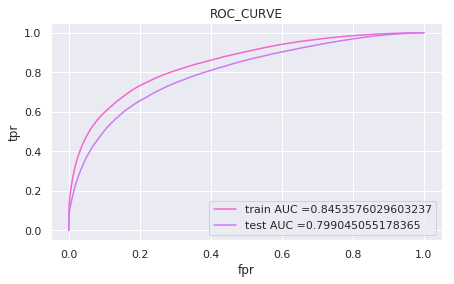

the maximum value of tpr*(1-fpr) 0.5858098761485444 for threshold 0.384
the maximum value of tpr*(1-fpr) 0.5294559205661779 for threshold 0.343


<Figure size 432x288 with 0 Axes>

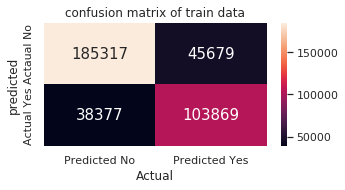

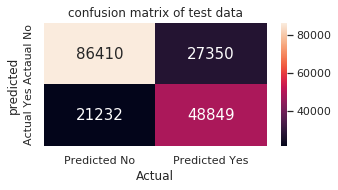

train_auc_score = 0.8453576029603237
validation_auc_score = 0.799045055178365
--------------------------------------------------------------------------------------------------------------
logloss Train:-- 7.778406271163552
logloss Test:-- 9.12736932353102
--------------------------------------------------------------------------------------------------------------
F1 Train:-- 0.7119337614892698
F1 Test:-- 0.6678835110746514


In [ ]:
best_para={'subsample': 0.3, 'n_estimators': 1200, 'max_depth': 7, 'learning_rate': 0.15, 'colsample_bytree': 0.1}

clf = lgb.LGBMClassifier(subsample=best_para.get('subsample'),n_estimators=best_para.get('n_estimators'),
                       max_depth=best_para.get('max_depth'),learning_rate=best_para.get('learning_rate'),
                        colsample_bytree=best_para.get('colsample_bytree'))
clf.fit(X_train_imp,y_train)

plot_roc_confusion_matrix_f1(clf,X_train_imp,y_train,X_cv_imp,y_cv)


### Comparision

In [ ]:
from prettytable import PrettyTable
ptable = PrettyTable()


ptable.title = "Comparision Between Different Models on Test Auc and F1 Score With Different dataset"

ptable.field_names = ["Model",'Datset','Test AUC','Test F1']
ptable.add_row(['Logistic Regression','Dataset-1','0.73514','0.62004'])
ptable.add_row(['Navie Bayes','Dataset-1','0.51854','0.55965'])
ptable.add_row(['Descision  Tree','Dataset-1','0.80175','0.68137'])
ptable.add_row(['Random Forest','Dataset-1','0.73544','0.60794'])
ptable.add_row(['LightGBM','Dataset-1','0.84105','0.71214'])
ptable.add_row(['LightGBM','Top 200 Important_features of \n dataset-2','0.79798','0.66717'])

ptable.add_row(["\n","\n","\n",'\n'])

ptable.add_row(['Logistic Regression','Dataset-2','0.73524','0.61504'])
ptable.add_row(['Navie Bayes','Dataset-2','0.51840','0.55956'])
ptable.add_row(['Descision  Tree','Dataset-2','0.81083','0.69261'])
ptable.add_row(['Random Forest','Dataset-2','0.72733','0.60205'])
ptable.add_row(['LightGBM','Dataset-2','0.82140','0.69363'])
ptable.add_row(['LightGBM','Top 200 Important_features of \n dataset-2','0.79904','0.66788'])
ptable.add_row(["\n","\n","\n",'\n'])

print(ptable)

+-----------------------------------------------------------------------------------------+
|   Comparision Between Different Models on Test Auc and F1 Score With Different dataset  |
+-------------------------+--------------------------------------+------------+-----------+
|          Model          |                Datset                |  Test AUC  |  Test F1  |
+-------------------------+--------------------------------------+------------+-----------+
|   Logistic Regression   |              Dataset-1               |  0.73514   |  0.62004  |
|       Navie Bayes       |              Dataset-1               |  0.51854   |  0.55965  |
|     Descision  Tree     |              Dataset-1               |  0.80175   |  0.68137  |
|      Random Forest      |              Dataset-1               |  0.73544   |  0.60794  |
|         LightGBM        |              Dataset-1               |  0.84105   |  0.71214  |
|         LightGBM        |    Top 200 Important_features of     |  0.79798   | 

### Conclusion
1. LightGBM with dataset-1(with outliers) gives the best Test AUC and F1 without  overfitting.
